Este es un notebook dedidacado al estudio de ML desde el curso de domestika Introduccion a la IA con Python de Rodrigo Montemayor.

Primero aprendimos sobre la instalación de los recursos necesarios para llevas a cabo el curso; si bien se recomienda usar Colab personalmente opte por utilizar mi computador personal y Visual Studio Code.

Modelos Basicos de ML:

Modelos de regresion son aquellos que predicen un dato continuo asi como precios, acciones y demas.
Modelos de clasificacion son aquellos que se enfocan en seleccionar datos y asiganarlos a la categoria correcta.

Aprendizaje supervisado: Este necesita que la data este etiquetada para poder prodecir el el valor futuro
Aprendizaje no supervisado: Este no requiere de una etiqueta ya que se basa en el reconocimiento de patrones con el finde predicir el valor o de hacer cluster de los datos para poder agruparlos dependiendo de las caracteristicas que este encuentre.
Aprendizaje por refuerzo: Este se basa en la retroalimentacion continua donde se le dice al modelo si lo hizo bien o mal, dandole un puntaje y de esta forma el modelo busaca obtener los mejores resultados con el fin de aprender a conseguir el mejor puntaje. Asi como la IA aprendio a jugar ajedrez.

EN EL ML Los datos los son todo, buenos datos llevan a buenos modelo.

Una seleccion de los datos debe destinarse al aprendizaje o entrenamiento, la otra se debe destinar a la evaluacion del modelo.




AQUI HAREMOS NUESTRO PRIMER MODELO

In [2]:
import pandas as pd

datos = pd.read_csv("celsius.csv")
datos.head()


,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


<Axes: xlabel='celsius', ylabel='fahrenheit'>

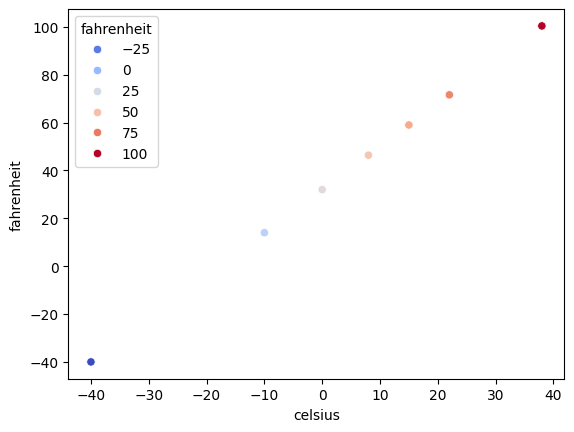

In [3]:

import seaborn as sb

sb.scatterplot(x="celsius", y="fahrenheit", data=datos, 
               hue="fahrenheit", palette="coolwarm")

In [4]:
#Ahora pasaremos a separar los datos
#Caracteristiscas (X), etiqueta(y)

X = datos["celsius"]
y = datos["fahrenheit"]

#Transformacion de datos
X_procesada = X.values.reshape(-1,1)
y_procesada = y.values.reshape(-1,1)

print("La X procesada es: "+str(X_procesada))
print("La y procesada es: "+str(y_procesada))


La X procesada es: [[-40]
 [-10]
 [  0]
 [  8]
 [ 15]
 [ 22]
 [ 38]]
La y procesada es: [[-40. ]
 [ 14. ]
 [ 32. ]
 [ 46.4]
 [ 59. ]
 [ 71.6]
 [100.4]]


In [5]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

#Entrenamiento
modelo.fit(X_procesada,y_procesada)

LinearRegression()

In [6]:
#Prediccion del modelo
celsius = 7900
prediccion = modelo.predict([[celsius]])
print(f"{celsius} °C son {prediccion} °F")

7900 °C son [[14252.]] °F


In [7]:
#Precision de 0 a 1 del modelo
modelo.score(X_procesada,y_procesada)

1.0

REGRESION LINEAL EN DETALLE

regresion lineal por cuadrados minimos OLS

Modelo de peso segun estatura, edad y genero:

In [ ]:
datosPeso = pd.read_csv("ModeloPeso.csv")

datosPeso.head()

,Sexo,Peso,Altura
0,Hombre,109,187
1,Hombre,73,174
2,Hombre,96,188
3,Hombre,99,182
4,Hombre,93,177


<Axes: xlabel='Altura', ylabel='Peso'>

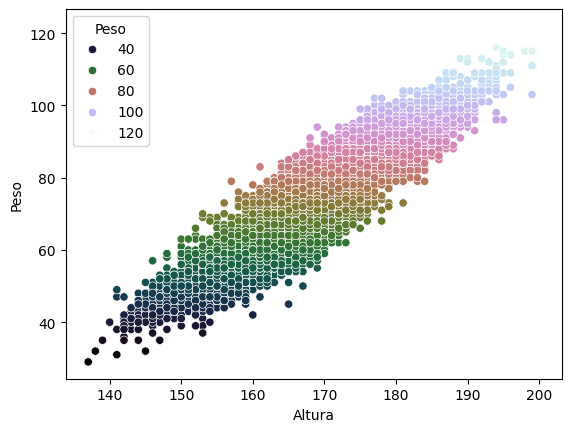

In [25]:
sb.scatterplot(x="Altura", y="Peso", data=datosPeso, 
               hue="Peso", palette="cubehelix")

In [31]:
X_Peso = datosPeso["Altura"]

y_Peso = datosPeso["Peso"]

#Transformacion de datos
X_procesada_Peso = X_Peso.values.reshape(-1,1)
y_procesada_Peso = y_Peso.values.reshape(-1,1)


modeloPeso= LinearRegression()

#Entrenamiento
modeloPeso.fit(X_procesada_Peso,y_procesada_Peso)

#Prediccion del modelo
talla = 187
Peso = modeloPeso.predict([[talla]])
print(f"El peso es de {Peso} en Kg para una persona de {talla} cm")


precision = modeloPeso.score(X_procesada_Peso,y_procesada_Peso)*100

print(f"La presición del modelo es de: {precision:.2f}%")

El peso es de [[98.80692275]] en Kg para una persona de 187 cm
La presición del modelo es de: 85.40%


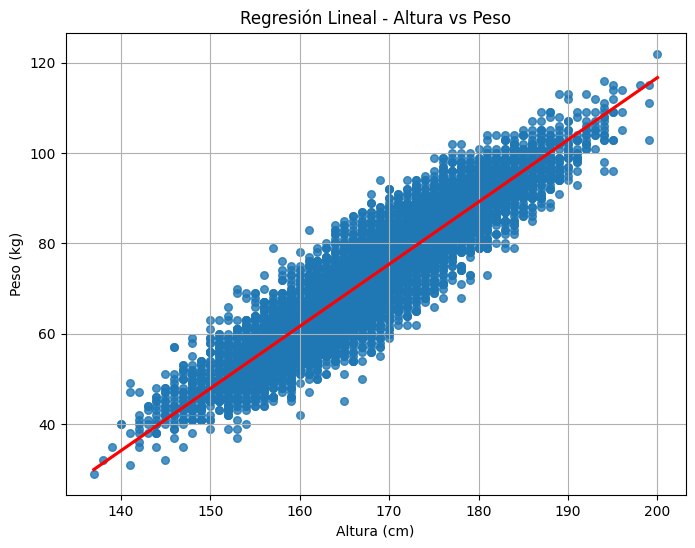

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x=X_Peso, y=y_Peso, line_kws={"color": "red"}, scatter_kws={"s": 30})
plt.title("Regresión Lineal - Altura vs Peso")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.grid(True)
plt.show()